# Assignment Four Solutions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: - Using

$$
\sin(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j + 1)!}x^{2j +1},
$$

derive a Taylor series for $\sin(x^{2})$ around $x=0$.  
a. _(3pts)_ Write a code which computes the Taylor series of $\sin(x^{2})$ using recursion and a tolerance based while loop approach.

b. _(4pts)_  On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. 

c. _(3pts)_ Describe your graphs and comment on any trends you observe.

_Answers to Problem 1_

_1a_ $$
\sin(x^2) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j + 1)!}x^{4j +2},
$$

Let $$a_j = \frac{(-1)^{j}}{(2j + 1)!}x^{4j +2}$$ then we can write that:

$$
a_{j}(x) = \left\{
\begin{array}{rl}
\frac{-x^4}{(2j+1)(2j)} a_{j-1} & j\geq 1\\
x^2 & j=0
\end{array}
\right.
$$


In [2]:

from copy import copy


In [3]:
#Non-vectorized code
def sinsq(x,tol):
    tot = x**2
    aj = copy(tot)
    j=1
    x4 = -x**4.
    while np.abs(aj)>=tol:
        aj *= x4/((2.*j+1.)*(2.*j))
        tot +=aj
        j +=1
    return tot

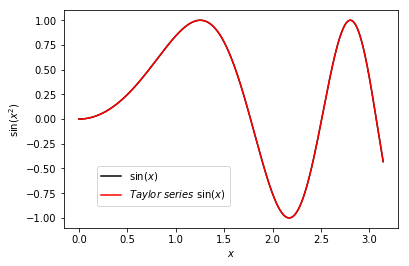

In [4]:
xvals = np.linspace(0.,np.pi,int(1e3))
svalst = np.sin(xvals**2.)
svals1 = [sinsq(xval,1e-4) for xval in xvals]

plt.figure(1)
plt.plot(xvals,svalst,color='k', label="$\sin(x)$")
plt.plot(xvals,svals1,color='r', label="$Taylor \ series \ \sin(x)$" )
plt.xlabel('$x$')
plt.ylabel('$\sin(x^{2})$')

plt.legend(loc=(.1,.1))

In [5]:
#Vectorized code
def sinsq_vec(x,tol):
    tot = x**2.
    aj = copy(tot)
    j=1
    x4 = -x**4.
    while np.max(np.abs(aj))>= tol:
        aj *= x4/((2.*j+1.)*(2.*j))
        tot +=aj
        j +=1
    return tot

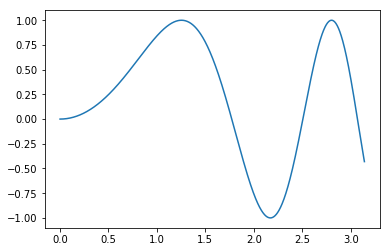

In [6]:
xvals = np.linspace(0,np.pi,int(1e3))
yvals = [np.sin(ii**2) for ii in xvals]
yvals_nonvec = [sinsq(ii,1e-4) for ii in xvals] 
plt.plot(xvals, yvals_nonvec)

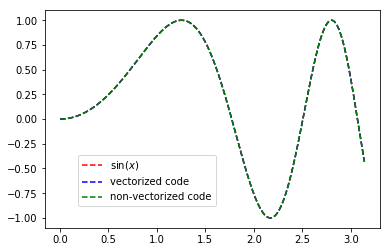

In [7]:
xvals = np.linspace(0,np.pi,int(1e3))
yvals = [np.sin(ii**2) for ii in xvals]

yvals_nonvec = [sinsq(ii,1e-4) for ii in xvals] 
yvals_vec = sinsq_vec(xvals,1e-4)

plt.plot(xvals,yvals, color='r',ls='--', label="$\sin(x)$")
plt.plot(xvals, yvals_vec, color='b',ls='--', label="vectorized code")
plt.plot(xvals, yvals_nonvec, color='g',ls='--', label="non-vectorized code")

plt.legend(loc=(.1,.1))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0,0.5,'$\\log_{10}|Error|$')

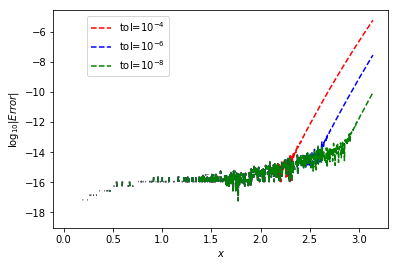

In [8]:
yvals_vec1 = sinsq_vec(xvals,1e-4)
yvals_vec2 = sinsq_vec(xvals,1e-6)
yvals_vec3 = sinsq_vec(xvals,1e-8)

plt.plot(xvals,np.log10(np.abs(yvals-yvals_vec1)),color='r',ls='--',label='tol=$10^{-4}$')
plt.plot(xvals,np.log10(np.abs(yvals-yvals_vec2)),color='b',ls='--',label='tol=$10^{-6}$')
plt.plot(xvals,np.log10(np.abs(yvals-yvals_vec3)),color='g',ls='--',label='tol=$10^{-8}$')

plt.legend(loc=(.1,.7))

plt.xlabel('$x$')
plt.ylabel('$\log_{10}|Error|$')

_1c_ Describe your graphs and comment on any trends you observe

As we see from the log plot of the error, our Taylor series approximation to $\sin(x^{2})$ gets worse the further from $x=0$ that we get, regardless of the tolerance value.  However, we see that the approximation also improves markedly as we reduce the tolerance so that when `tol`=$10^{-8}$, our approximation is good to at least ten digits even when $x$ is close to $\pi$.

** Problem 2 **: 7 pts- An important function in physics is the Airy function given by the Taylor Series

$$
y_{1}(x) = 1 + \sum_{m=1}^{\infty}c_{m}x^{3m}, ~ c_{m} = \prod_{l=1}^{m} \frac{1}{(3l-1)(3l)}.
$$

Note the coefficients $c_{m}$ follow the pattern

\begin{align}
c_{1} = & \prod_{l=1}^{1} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3}\\
c_{2} = & \prod_{l=1}^{2} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3 \cdot 5 \cdot 6}
\end{align}

a. _(4pts)_ Using recursion and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value.  

b. _(3pts)_ Provide plots for $L_{x}= 3, 19$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. Add legends to your plots.

_Answers to Problem 2_

So, if we define the terms of our series $a_{m}(x)=c_{m}x^{3m}$, we see that 

$$
\frac{a_{m}(x)}{a_{m-1}(x)} = \frac{x^{3}}{(3m-1)(3m)}
$$

so that we see 

$$
a_{m}(x) = \left \{\begin{array}{rl} \frac{x^{3}}{(3m-1)(3m)}a_{m-1}(x) & m\geq 1 \\ 1 & m=0  \end{array}\right.
$$

In [9]:
def Airyfun(x,tol):
    tot = 1.
    am = 1.
    x3 = x**3.
    m = 1
    while np.abs(am)>=tol:
        am *= x3/(3.*m*(3.*m-1.))
        tot += am
        m += 1
    return tot
    

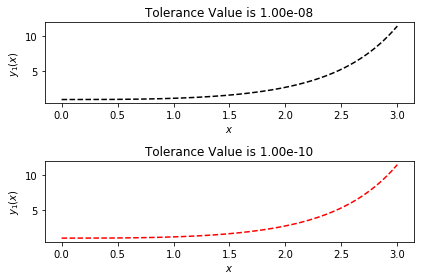

In [10]:

xvals_03 = np.linspace(0.,3.,int(1e3))
yvalAF_031 = [Airyfun(ii,1e-8) for ii in xvals_03]
yvalAF_032 = [Airyfun(ii,1e-10) for ii in xvals_03]


plt.subplot(2,1,1)
plt.plot(xvals_03,yvalAF_031, color='k',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xvals_03,yvalAF_032, color='r',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

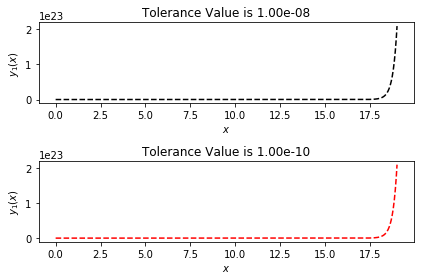

In [11]:
xvals_19 = np.linspace(0.,19.,int(1e3))
yvalAF_191 = [Airyfun(ii,1e-8) for ii in xvals_19]
yvalAF_192 = [Airyfun(ii,1e-10) for ii in xvals_19]


plt.subplot(2,1,1)
plt.plot(xvals_19,yvalAF_191, color='k',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xvals_19,yvalAF_192, color='r',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

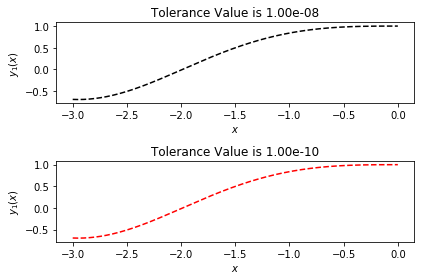

In [12]:
xvals_neg03 = np.linspace(-3,0,int(1e3))
yvalAF_neg031 = [Airyfun(ii,1e-8) for ii in xvals_neg03]
yvalAF_neg032 = [Airyfun(ii,1e-10) for ii in xvals_neg03]


plt.subplot(2,1,1)
plt.plot(xvals_neg03,yvalAF_neg031, color='k',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xvals_neg03,yvalAF_neg032, color='r',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

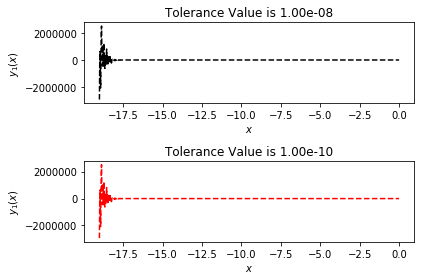

In [13]:
xvals_neg19 = np.linspace(-19.,0.,int(1e3))
yvalAF_neg191 = [Airyfun(ii,1e-8) for ii in xvals_neg19]
yvalAF_neg192 = [Airyfun(ii,1e-10) for ii in xvals_neg19]


plt.subplot(2,1,1)
plt.plot(xvals_neg19,yvalAF_neg191, color='k',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xvals_neg19,yvalAF_neg192, color='r',ls='--', label='Airy Function')
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

Describe the phenomena you see in the eight different plots. Add legends to your plots.

As we see, for $x\geq 0$, $y_{1}(x)$ grows rapidly, and we can believe our results since this persists over different domain sizes and is unchanged by decreasing the tolerance.  Likewise, we anticipate that $y_{1}(x)$ oscillates for $x\leq 0$.  However, we also see that near $x=-19$ our approximation likely breaksdown since the behavior changes in an unexpected way.  This shift in behavior persists even after decreasing the tolerance, so it is not immediatley clear at this time what the cause of this radical change in the behavior of our approximation is. 

_Provide Summary of Results for Problem 2 Here_

** Problem 3 **: 5 pts- If we list all the natural numbers below 15 that are multiples of 4 or 7, we get 4, 7, 8, 12, 14.  The sum of these multiples is 45.  Find the sum of all multiples of 4 or 7 below 162.  Note, you will need to make use of the mod command `%`, which in effect finds remainders from division.  Note the use below. Likewise you will also need to use the logical operation `or`. 

In [14]:
# How to use %

print 1%2
print 2%2
print 3%2
print 4%2
print
print 11%5
print 12%5
print 13%5
print 14%5
print 15%5

1
0
1
0

1
2
3
4
0


_Answer to Problem 3_  

In [15]:
tot = 0
for jj in xrange(0,162):
    if jj%4 == 0 or jj%7 == 0:
        tot += jj
print "The sum of all the numbers which are multiples of either 4 or 7 which are less than 162 is: %3d" % tot

The sum of all the numbers which are multiples of either 4 or 7 which are less than 162 is: 4792


** Problem 4 **: 5 pts - Using a for loop based approach, write a program which finds 

$$
\frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{4} + 3\left(\frac{j}{n}\right)^{2} \right)
$$

for any positive integer n.  Generate a labeled plot of the results of your function for $1\leq n \leq 100$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph.       

_Answer to Problem 4_

In [4]:
def func(n):
    tot = 0.
    ncmp = float(n)
    for jj in xrange(1,int(n)+1):
        jsq = (jj/ncmp)**2.
        tot += (jsq + 3.)*jsq
    return tot/ncmp

Text(0.5,0,'$n$')

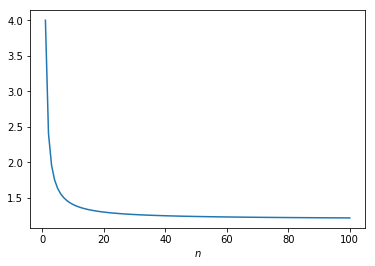

In [5]:
#The solution is different 
#if you use nvals = np.linspace(1.,100.,1000)
#see below
nvals = np.linspace(1.,100.,100)
fvals = [func(nval) for nval in nvals]

plt.plot(nvals,fvals)
plt.xlabel('$n$')

Text(0.5,0,'$n$')

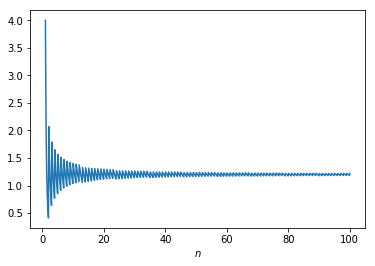

In [6]:
nvals = np.linspace(1.,100.,1000)
fvals = [func(nval) for nval in nvals]

plt.plot(nvals,fvals)
plt.xlabel('$n$')

As we see, there is a natural limit to $f(n)$ as $n$ gets large.  We might reasonably conjecture, using 

In [18]:
print "f(100)=%2.15f" % func(100)

f(100)=1.220083333000000


that

$$
\lim_{n\rightarrow \infty} f(n) \approx 1.22008333
$$